In [3]:
import pandas as pd


In [1]:

# load our dataset
from google.colab import files
uploaded = files.upload()


Saving iris .csv to iris .csv


In [38]:
import io
iris = pd.read_csv(io.BytesIO(uploaded['iris .csv']))
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [7]:
iris.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
print("Target Labels", iris["Classification"].unique())

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



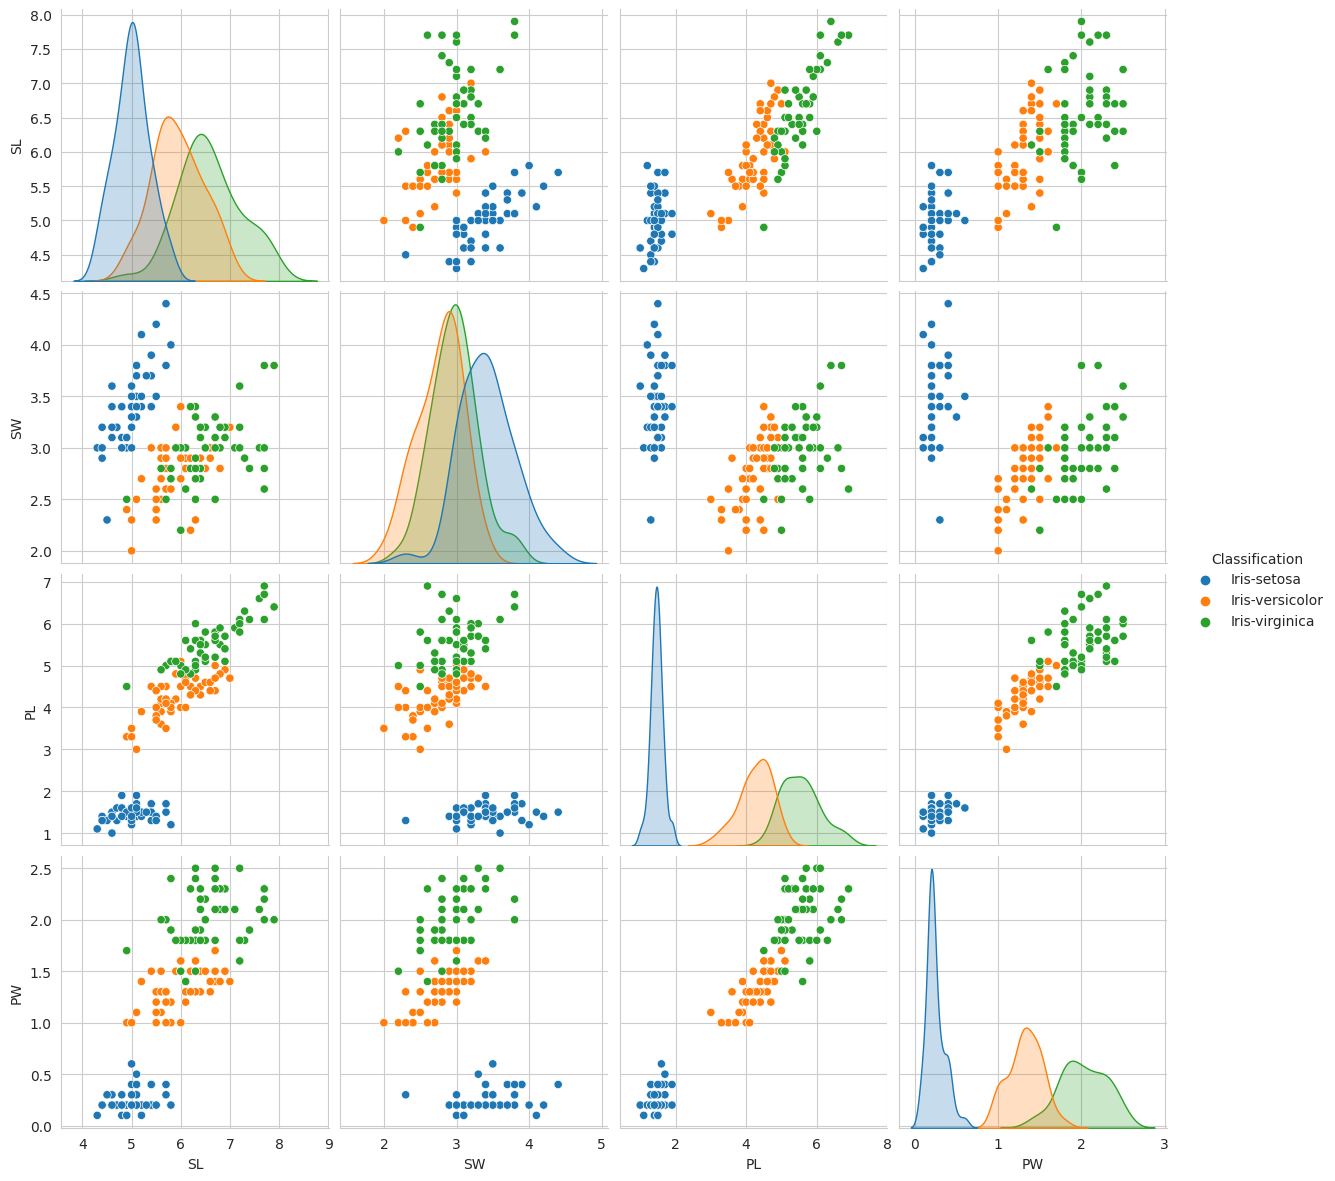

In [39]:
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(data=iris,hue="Classification",size=3);
plt.show()

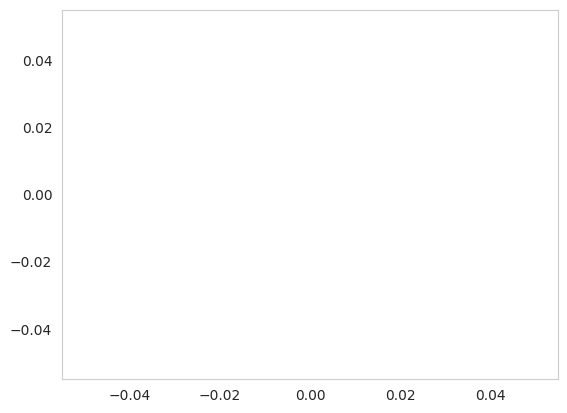

In [61]:
iris_setosa = iris.loc[iris["Classification"] == "Iris-Setosa"];
iris_virginica = iris.loc[iris["Classification"] == "Iris-Virginica"];
iris_versicolor = iris.loc[iris["Classification"] == "Iris-Versicolor"];
counts, bin_edges = np.histogram(iris_setosa['PL'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.grid()
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

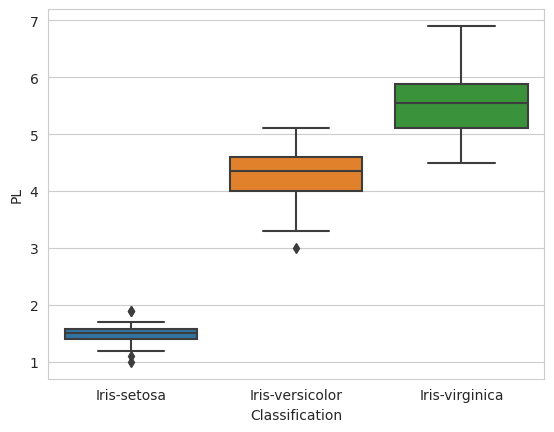

In [56]:
sns.boxplot(x="Classification",y="PL", data=iris)
plt.show()

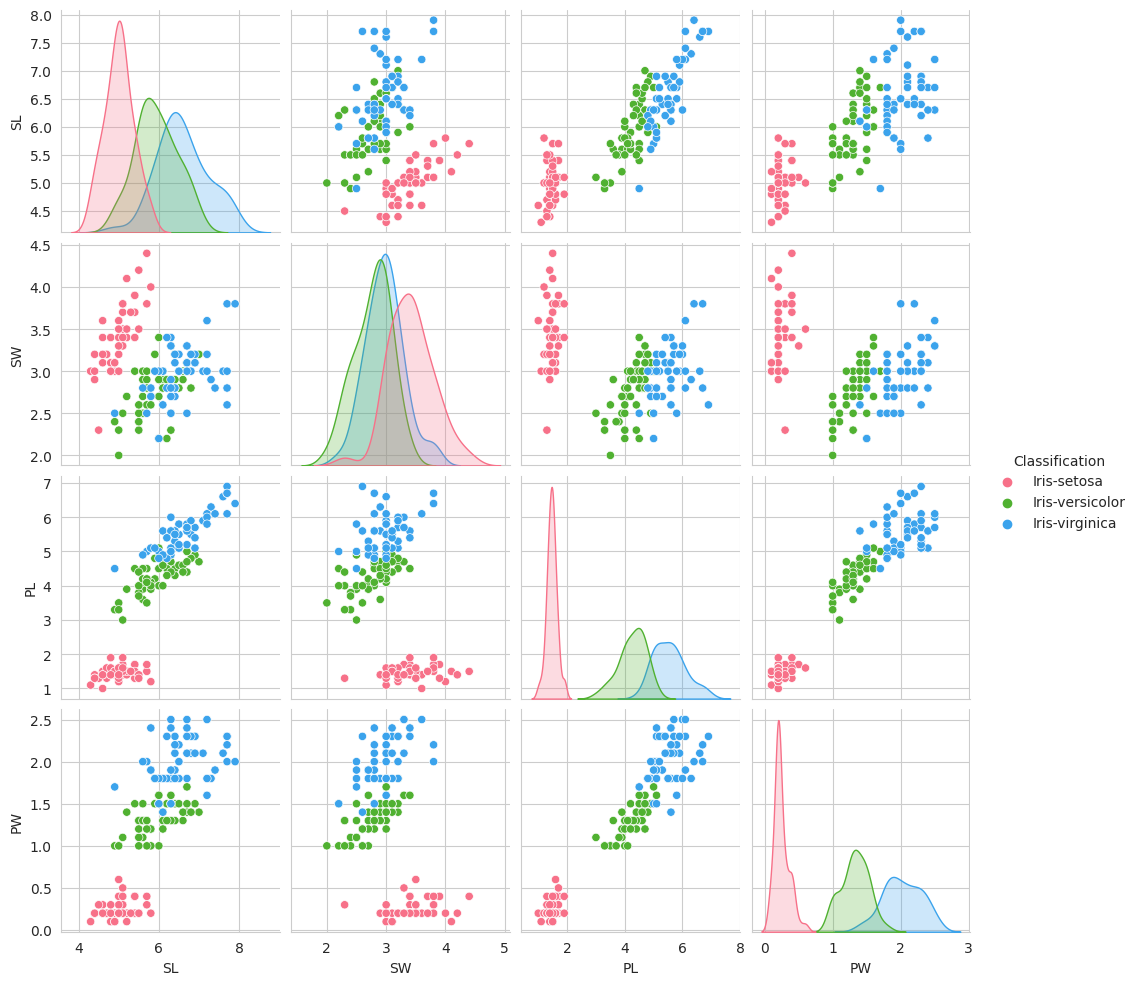

In [64]:
sns.pairplot(data=iris, hue="Classification", palette="husl")

In [13]:
import plotly.express as px
fig = px.scatter(iris, x="SW", y="SL", color="Classification")
fig.show()

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = iris.drop("Classification", axis=1)
y = iris["Classification"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify = y)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [69]:
from sklearn.linear_model import LogisticRegression
#create the model instance
model = LogisticRegression()
#fit the model on the training data
model.fit(X_train, y_train)

# Output = 0.9666666666666667
#the test score is already very high, but we can use the cross validated score to ensure the model's strength
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))


0.9499999999999998


In [70]:
#the score, or accuracy of the model
model.score(X_test, y_test)

0.9666666666666667

### **KNN**

In [65]:

x = iris.drop("Classification", axis=1)
y = iris["Classification"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [15]:
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))


Prediction: ['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://5t6hiq13g6h-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [32]:
from flask import Flask, render_template, request
app = Flask(__name__, template_folder='/My Drive/templates')
@app.route("/")
def home():
    return render_template('home.html')
@app.route("/iris")
def iris():
    return render_template('iris.html')
@app.route('/predict',methods = ['POST', 'GET'])
def predict():
  if request.method == 'POST':
      sl = request.form['sl']
      sw = request.form['sw']
      pl = request.form['pl']
      pw = request.form['pw']
      sample = [int(sl),int(sw),int(pl),int(pw)]
      prediction = knn.predict(x_new)
      return render_template("pred.html", value=prediction)

if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
